In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("bmi.csv")

In [10]:
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [12]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [56]:
df.isnull().values.any() #Checking if there are null values in our dataframe

False

In [14]:
df.duplicated().values.any()

True

In [16]:
print(df[df.duplicated()]) # Which makes sense for having duplicated values for this our data frame

     Gender  Height  Weight  Index
187  Female     182      84      3
310    Male     171     147      5
327  Female     167      85      4
355    Male     174      90      3
365    Male     141      80      5
381    Male     191      62      1
382    Male     177     117      4
395  Female     164      71      3
400  Female     195     104      3
462    Male     179      56      1
482  Female     142      86      5


# Data Visualization

C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


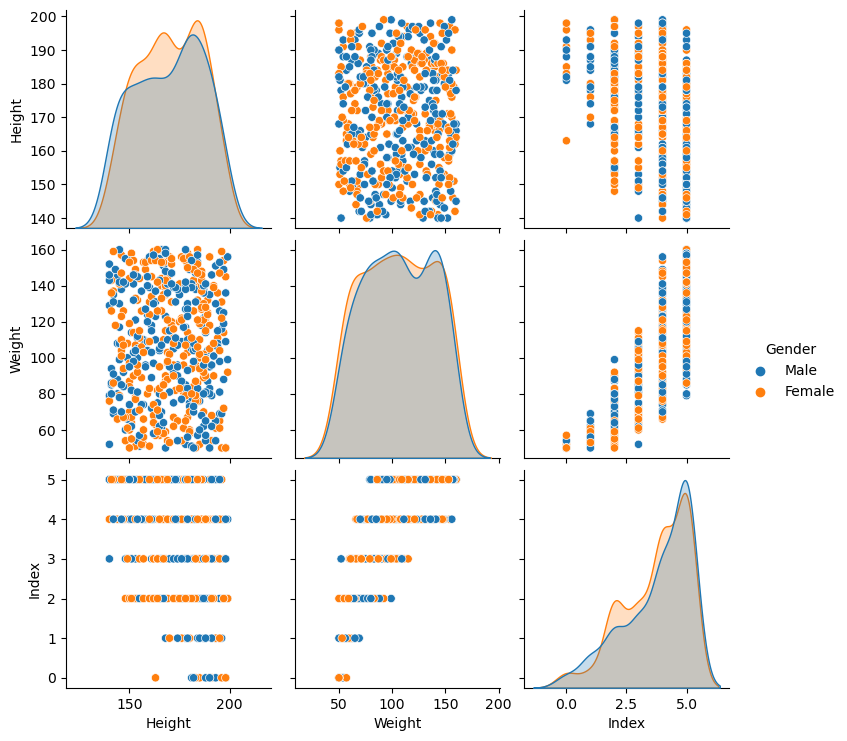

In [9]:
sns.pairplot(df,hue="Gender") #Looking at how the different features relate to each other

<Axes: xlabel='Index', ylabel='count'>

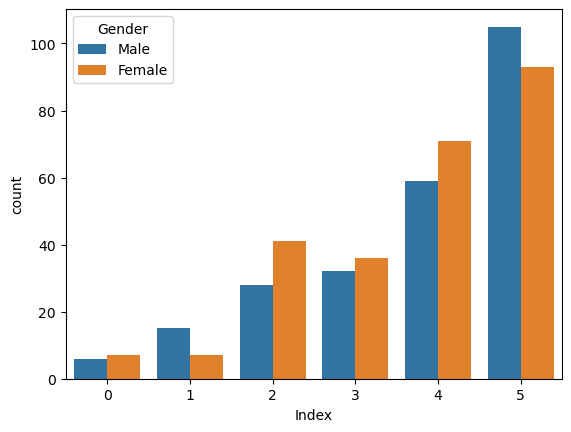

In [17]:
sns.countplot(df,x = "Index",hue = "Gender")

C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


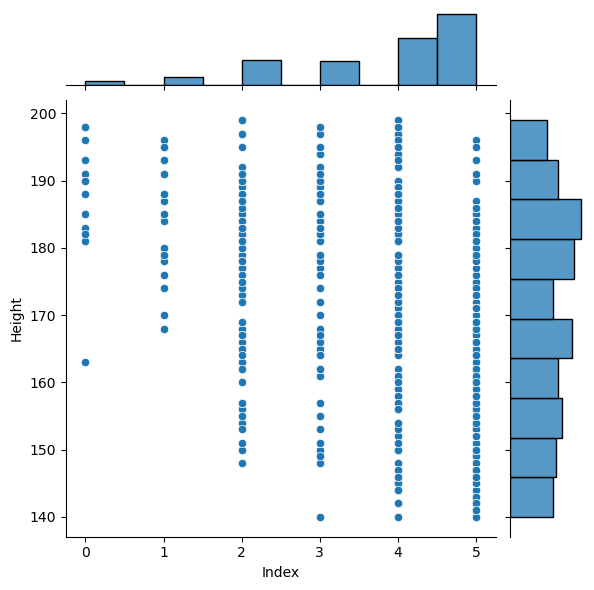

In [30]:
sns.jointplot(df,x="Index",y = "Height")

C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hottec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


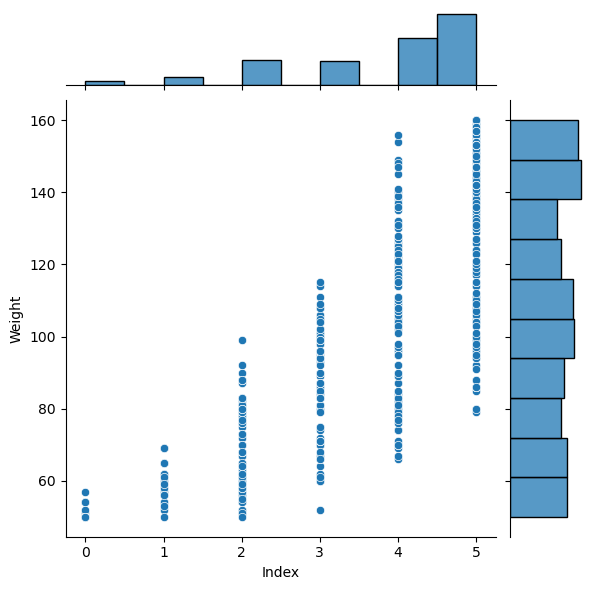

In [31]:
sns.jointplot(df,x="Index",y = "Weight")

# Converting Categorical Features

In [ ]:
# Converting categorical features to dummy variables otherwise our machine learning algorithm would not be able to take in thsoe features as inputs.

In [4]:
sex = pd.get_dummies(df["Gender"], drop_first=True) # Creating dummy variable
new_df  = pd.concat([df,sex], axis=1) # Creating a new variable by concatenating the previous dataframe with the dummy variable created
new_df.drop("Gender", inplace=True, axis = 1)

In [5]:
print(new_df)

     Height  Weight  Index   Male
0       174      96      4   True
1       189      87      2   True
2       185     110      4  False
3       195     104      3  False
4       149      61      3   True
..      ...     ...    ...    ...
495     150     153      5  False
496     184     121      4  False
497     141     136      5  False
498     150      95      5   True
499     173     131      5   True

[500 rows x 4 columns]


# Model Selections

# 1. Knearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaler.fit(new_df.drop("Index",axis=1))
scaled_features = scaler.transform(new_df.drop("Index",axis=1))

In [37]:
print(new_df.columns)

Index(['Height', 'Weight', 'Index', 'Male'], dtype='object')


In [38]:
df_features = pd.DataFrame(scaled_features,columns =['Height', 'Weight','Male'])
print(df_features)

       Height    Weight      Male
0    0.247939 -0.309117  1.020204
1    1.164872 -0.587322  1.020204
2    0.920357  0.123647 -0.980196
3    1.531645 -0.061823 -0.980196
4   -1.280283 -1.391027  1.020204
..        ...       ...       ...
495 -1.219155  1.452850 -0.980196
496  0.859228  0.463676 -0.980196
497 -1.769315  0.927351 -0.980196
498 -1.219155 -0.340029  1.020204
499  0.186810  0.772793  1.020204

[500 rows x 3 columns]


In [40]:
from sklearn.model_selection import train_test_split

In [45]:
X = df_features
y = new_df["Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.83      0.71         6
           2       0.90      0.83      0.86        23
           3       0.84      0.84      0.84        19
           4       0.89      0.84      0.86        38
           5       0.94      0.97      0.95        63

    accuracy                           0.89       150
   macro avg       0.70      0.72      0.71       150
weighted avg       0.89      0.89      0.89       150



[[ 0  1  0  0  0  0]
 [ 0  5  1  0  0  0]
 [ 1  2 19  1  0  0]
 [ 0  0  1 16  2  0]
 [ 0  0  0  2 32  4]
 [ 0  0  0  0  2 61]]


The result as obtained above can be further improved by choosing a suitable value for K

Text(0, 0.5, 'Error Rate')

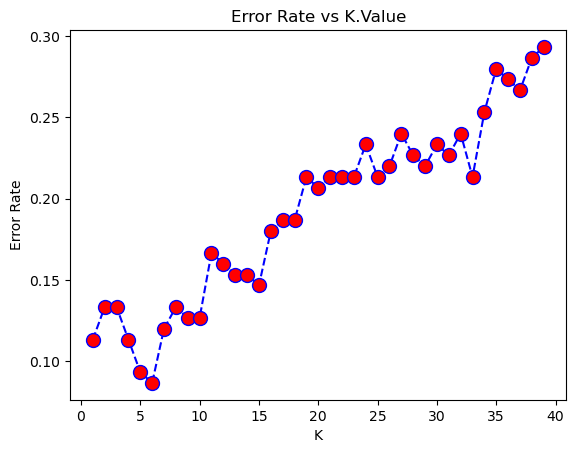

In [46]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predi = knn.predict(X_test)
    error_rate.append(np.mean(predi != y_test))

plt.plot(range(1,40), error_rate, color = "blue",linestyle = "dashed",marker = "o", markerfacecolor = "red", markersize = 10)
plt.title("Error Rate vs K.Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

The error rate tends to increase with increasing values of K
Choosing K=6 for instance,to see how well the model performs

In [55]:
knn = KNeighborsClassifier(n_neighbors=6) # k = 6
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.71      0.83      0.77         6
           2       0.95      0.87      0.91        23
           3       0.94      0.84      0.89        19
           4       0.87      0.89      0.88        38
           5       0.94      0.95      0.94        63

    accuracy                           0.91       150
   macro avg       0.82      0.90      0.84       150
weighted avg       0.91      0.91      0.91       150



[[ 1  0  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  2 20  1  0  0]
 [ 0  0  1 16  2  0]
 [ 0  0  0  0 34  4]
 [ 0  0  0  0  3 60]]


Which is somewhat better as compared to the first result

# Using Support Vector Machines

In [48]:
from sklearn.svm import SVC

In [49]:
model = SVC()
X = new_df.drop("Index", axis=1)
y = new_df["Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model.fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test,model_pred))
print("/n")
print(confusion_matrix(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.66      0.91      0.76        23
           3       0.78      0.37      0.50        19
           4       0.78      0.92      0.84        38
           5       0.95      0.97      0.96        63

    accuracy                           0.83       150
   macro avg       0.53      0.53      0.51       150
weighted avg       0.80      0.83      0.80       150

/n
[[ 0  0  1  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 21  2  0  0]
 [ 0  0  4  7  8  0]
 [ 0  0  0  0 35  3]
 [ 0  0  0  0  2 61]]


C:\Users\hottec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hottec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hottec\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Again, in the above case,our model could still be improved by implementing GridSearch which just aims at trying a bunch of all possible combinations to see what works best.

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.386 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [53]:
print(classification_report(y_test,grid_predictions))
print("\n")
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.71      0.83      0.77         6
           2       1.00      0.83      0.90        23
           3       0.90      0.95      0.92        19
           4       0.95      0.97      0.96        38
           5       0.98      0.98      0.98        63

    accuracy                           0.95       150
   macro avg       0.84      0.93      0.87       150
weighted avg       0.95      0.95      0.95       150



[[ 1  0  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  2 19  2  0  0]
 [ 0  0  0 18  1  0]
 [ 0  0  0  0 37  1]
 [ 0  0  0  0  1 62]]


# There seems to have been a better improvement in our model when using Support Vector Machines as compared to Knearest Neighbors for our classification.